In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import cv2

import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
#sys.path.append("..")
import warnings
import mlflow

#from modeling.config import EXPERIMENT_NAME
#TRACKING_URI = open("../.mlflow_uri").read().strip()

import glob
import random
# Set the seed for reproducibility
random.seed(42)

In [257]:
path_to_yolo = '../models/yolov8x.pt'
yolo_model = YOLO(path_to_yolo)

In [274]:
#folder_path = "../data/CNR-Park_EXT_yolov8-2/train/images"
folder_path = '../data/PKLot/Sunny_most_empty/test/images'

# Get a list of all files in the folder
#all_files = os.listdir(os.path.join(folder_path,'images/'))
all_files = os.listdir(folder_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
random_images = random.sample(jpg_files, 5)

# image
paths_to_images = []
for each in random_images:
    paths_to_images.append(os.path.join(folder_path,each))

In [275]:

# Get a list of all files in the folder
#all_files = os.listdir(os.path.join(folder_path,'images/'))
all_files = os.listdir(folder_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
random_images = random.sample(jpg_files, 5)

# image
paths_to_images = []
for each in random_images:
    paths_to_images.append(os.path.join(folder_path,each))

In [278]:
def yolo_predict(model, img_path):
    pred = model(
        source=img_path, 
        save= False, 
        conf= 0.36,  # object confidence threshold for detection
        iou= 0.9,    # intersection over union (IoU) threshold for NMS
        classes = [2],
    )
    return pred


# Show the results for one image
def show_prediction(pred_result):
    for r in pred_result:
        im_array = r.plot(line_width=1)  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.figure(figsize=(15,10))
        plt.axis('off')
        plt.imshow(im)


image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2013-02-23_17_05_11.jpg: 384x640 4 cars, 479.2ms
Speed: 2.1ms preprocess, 479.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2013-02-23_17_40_12.jpg: 384x640 2 cars, 381.0ms
Speed: 1.0ms preprocess, 381.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2012-09-19_06_25_48.jpg: 384x640 3 cars, 382.3ms
Speed: 1.0ms preprocess, 382.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/thisal_weerasekara/neufische/pklot/notebooks/../data/PKLot/Sunny_most_empty/test/images/2013-02-24_18_30_13.jpg: 384x640 (no detections), 388.0ms
Speed: 1.0ms preprocess, 388.0ms inference, 0.4ms postprocess per image at sh

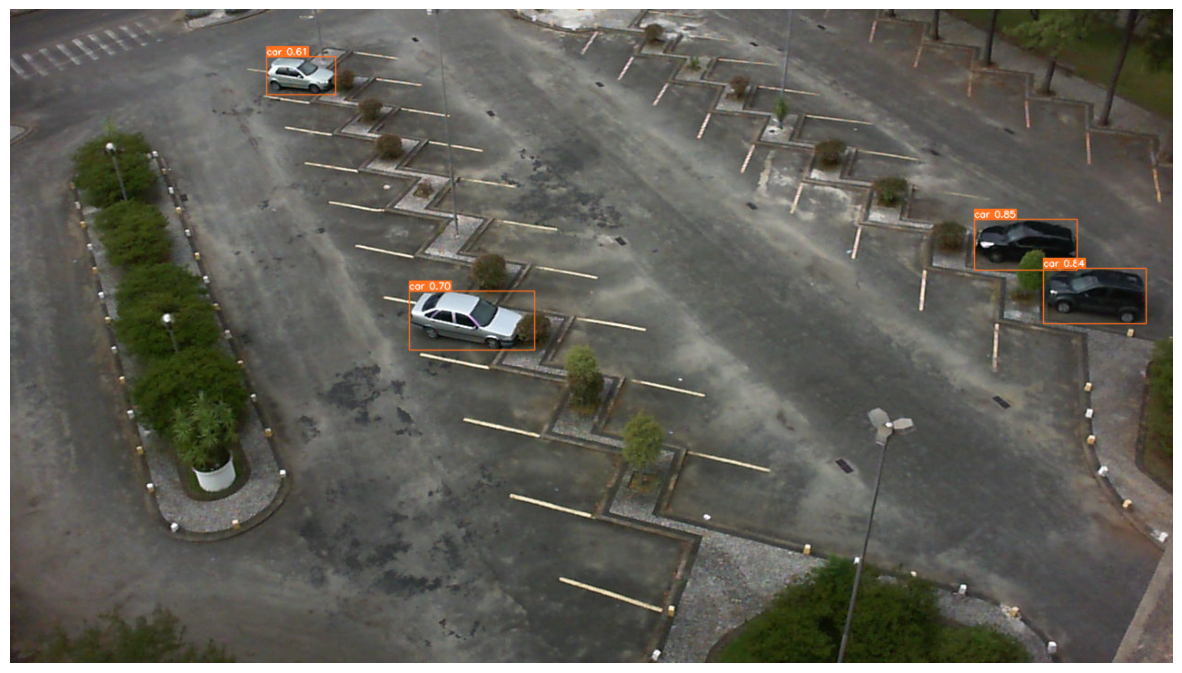

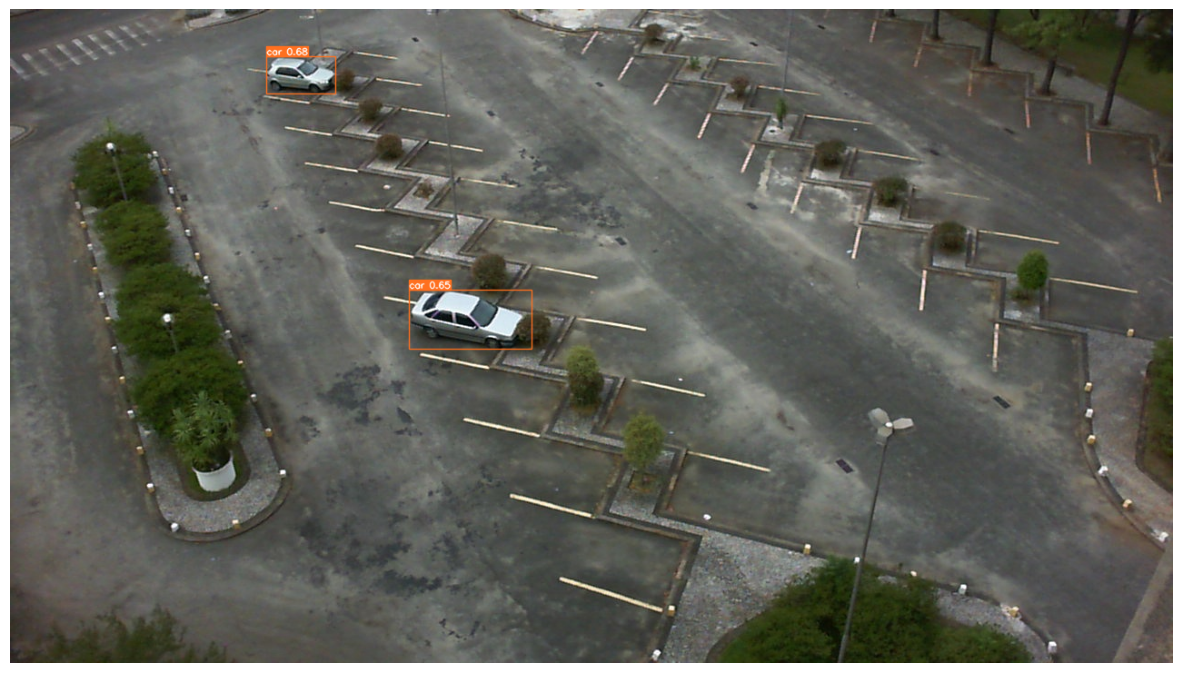

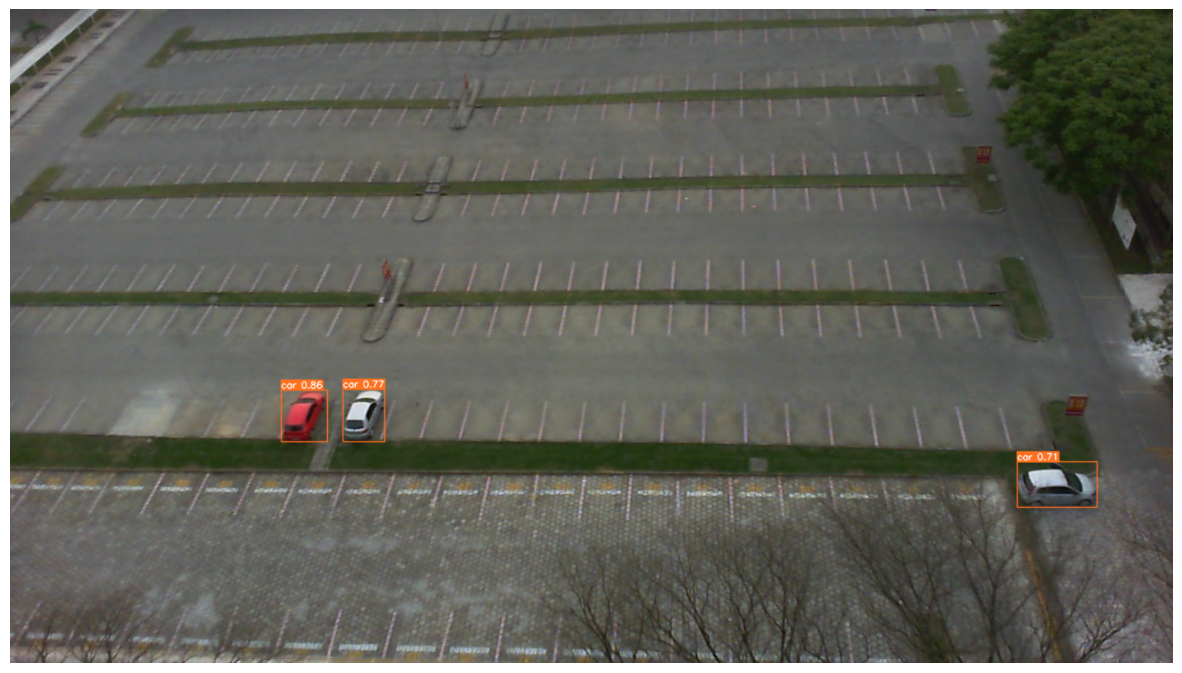

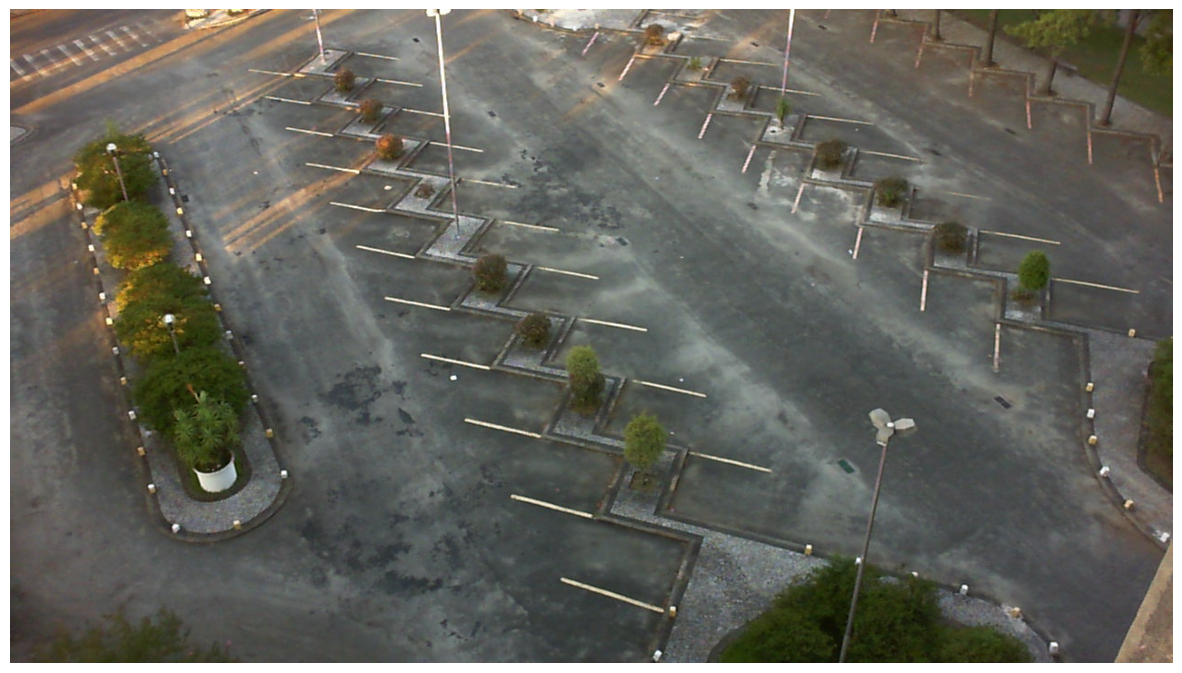

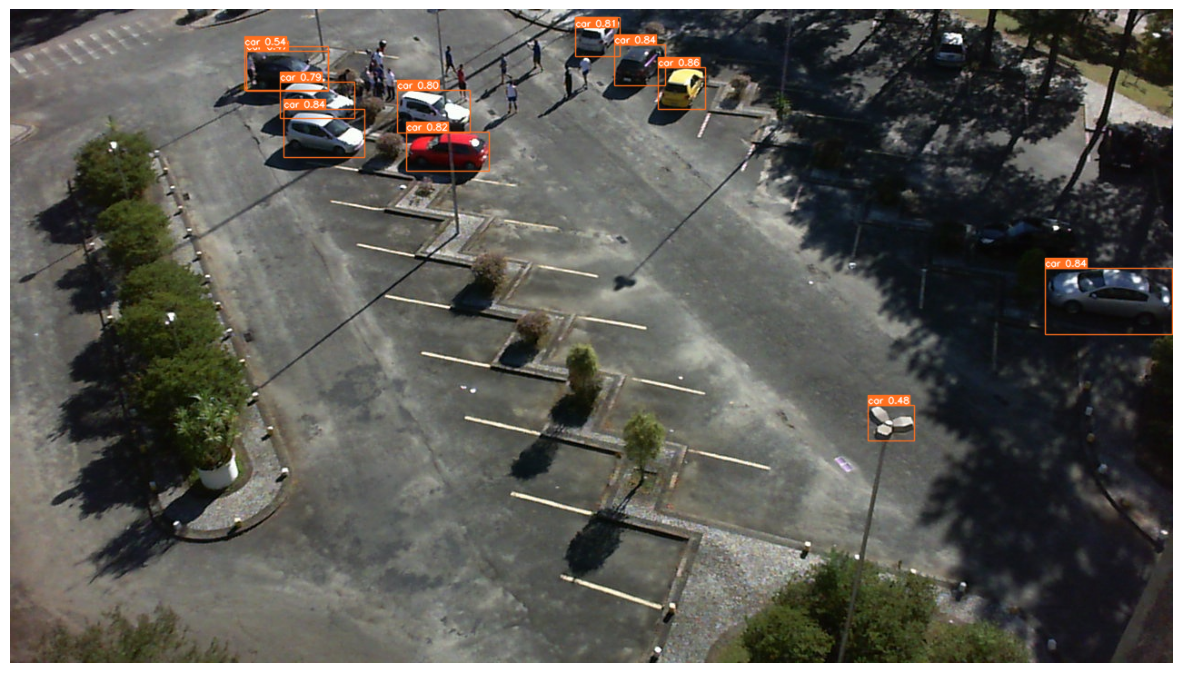

In [279]:
results = []
for each in paths_to_images:
    result = yolo_predict(yolo_model,each)
    show_prediction(result)